In [5]:
import os

In [1]:
import pandas as pd

In [61]:
import numpy as np

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt

In [116]:
import seaborn as sns

#### Step 1: Load each dataset
#### Step 2: Data Cleaning for  Customer A 
        * info
        * Check for unique values
        * Check for Missing Values
        * Check fro Duplicates
        * Clean Customer A (Rename columns, fix data types, remove leading/trailing spaces)
        * Revalidate after cleaning (Recheck for missing Values,duplicate Values and Unique values)
        Business Requirements
        *  Total Inventory Check (Sum of all available stock for Customer A,across all LG Modes and stores)
        *  Descriptive statistics of on-Hand Inventory (Detects Outliers which likely need manual correction or cleaning)
           i) If detected any remove outliers or replace it with 0.
            ii)Check again if the changes are applied.
        *  Track by Inventory Store (Which stores are holding most of the stock)
        *  Check for duplicate models with different EANs (to check if model has unique value or EAN, since same model can have different EANs which make EAN as unique ID for Inventory reference).
#### Step 3 : Repeat the same for Customer B and C.
#### Step 4 : Merge all the Files
#### Step 5 : Identify the Missing values and export to a seperate sheet 
#### Step 6 : Export Clean Data Set
#### Step 7 : Export Summary Report by Model
#### Step 8 : Create a Process Log
#### Step 9 : Create and save bar chart of top 10 models by inventory

In [7]:
os.chdir(r'D:\Education\Santhu\LG Electronics Project')

#### Step 1: Load each dataset

In [10]:
customer_a          = pd.read_csv('Customer A.csv',sep=';',encoding ='latin1')
customer_b_raw      = pd.read_excel('Customer B.xlsx',header = None)
customer_c          = pd.read_excel('Customer C.xlsx')                               

In [74]:
customer_c          = pd.read_excel('Customer C.xlsx') 

#### Step 2: Data Cleaning

In [11]:
customer_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EAN                 233 non-null    int64 
 1   ArtikelNummer       233 non-null    int64 
 2   ArtikelBezeichnung  233 non-null    object
 3   HerstellerArtNr     233 non-null    object
 4   FilialNummer        233 non-null    int64 
 5   FilialName          233 non-null    object
 6   Abverkauf           233 non-null    int64 
 7   Fakturadatum,       233 non-null    object
dtypes: int64(4), object(4)
memory usage: 14.7+ KB


In [12]:
#Check for misisng values
customer_a.isnull().sum()

EAN                   0
ArtikelNummer         0
ArtikelBezeichnung    0
HerstellerArtNr       0
FilialNummer          0
FilialName            0
Abverkauf             0
Fakturadatum,         0
dtype: int64

In [13]:
#Check duplicates
customer_a.duplicated().sum()

0

In [43]:
#Check for Unique Values
def check_uniques(df, label):
    print (f"\n --- Unique Value Check: {label} ---")
    print("Unique Customer(s):", df['Customer'].nunique() if 'Customer' in df.columns else 'N/A')
    print("Unique Models:", df['Model'].nunique() if 'Model' in df.columns else 'N/A')
    print("Unique EANs:", df['EAN'].nunique() if 'EAN' in df.columns else 'N/A')
    print("Unique StoreIDs:", df['StoreID'].nunique() if 'StoreID' in df.columns else 'N/A')
    print("Unique Store Names:", df['Store Name'].nunique() if 'Store Name' in df.columns else 'N/A')

In [44]:
# Check unique values before CLEANING
check_uniques(customer_a,"Customer A  - BEFORE CLEANING")


 --- Unique Value Check: Customer A  - BEFORE CLEANING ---
Unique Customer(s): N/A
Unique Models: N/A
Unique EANs: 47
Unique StoreIDs: N/A
Unique Store Names: N/A


In [98]:
# Clean Customer A
customer_a_clean      = customer_a.rename(columns={
    'HerstellerArtNr' :  'Model',
    'FilialNummer'    : 'StoreID',
    'FilialName'      :'Store Name',
    'Abverkauf'       : 'On-Hand (A)',
    'ArtikelBezeichnung' : 'Artikelbezeichnung',
    'EAN'                : 'EAN'
})

customer_a_clean['Customer'] = 'Customer A'
customer_a_clean['Model'] =  customer_a_clean['Model'].astype(str).str.strip()
customer_a_clean['ArtikelBezeichnung'] =  customer_a_clean['Artikelbezeichnung'].astype(str).str.strip() 
customer_a_clean['Store Name'] =  customer_a_clean['Store Name'].astype(str).str.strip()
customer_a_clean['EAN'] =  customer_a_clean['EAN'].astype(str).str.strip()
customer_a_clean['On-Hand (A)'] =  pd.to_numeric(customer_a_clean['On-Hand (A)'],errors='coerce')

In [99]:
customer_a_clean.head()

,EAN,ArtikelNummer,Artikelbezeichnung,Model,StoreID,Store Name,On-Hand (A),"Fakturadatum,",Customer,ArtikelBezeichnung
0,8806096014462,1441947,OLED65G49LS,OLED65G49LS.AEU,201,Schwentinental,1,"2025-05-24,",Customer A,OLED65G49LS
1,8806096362365,1478138,55NANO81A6A,55NANO81A6A.AEU,201,Schwentinental,1,"2025-05-24,",Customer A,55NANO81A6A
2,8806091277145,1345296,DSPD7Y,DSPD7Y.DDEULLK,206,Berlin-Pankow,1,"2025-05-22,",Customer A,DSPD7Y
3,8806096042540,1439519,OLED55B42LA,OLED55B42LA.AEU,212,Geldern,1,"2025-05-22,",Customer A,OLED55B42LA
4,8806096011157,1439546,65QNED87T6B,65QNED87T6B.AEU,212,Geldern,1,"2025-05-24,",Customer A,65QNED87T6B


In [19]:
customer_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EAN                 233 non-null    object
 1   ArtikelNummer       233 non-null    int64 
 2   ArtikelBezeichnung  233 non-null    object
 3   Model               233 non-null    object
 4   StoreID             233 non-null    int64 
 5   Store Name          233 non-null    object
 6   On-Hand (A)         233 non-null    int64 
 7   Fakturadatum,       233 non-null    object
 8   Customer            233 non-null    object
dtypes: int64(3), object(6)
memory usage: 16.5+ KB


In [20]:
customer_a_clean.isnull().sum()

EAN                   0
ArtikelNummer         0
ArtikelBezeichnung    0
Model                 0
StoreID               0
Store Name            0
On-Hand (A)           0
Fakturadatum,         0
Customer              0
dtype: int64

In [21]:
customer_a_clean.duplicated().sum()

0

In [45]:
# Check unique values AFTER CLEANING
check_uniques(customer_a_clean,"Customer A  - AFTER CLEANING")


 --- Unique Value Check: Customer A  - AFTER CLEANING ---
Unique Customer(s): 1
Unique Models: 47
Unique EANs: 47
Unique StoreIDs: 62
Unique Store Names: 62


In [23]:
#Check for duplicate models with different EANs
customer_a_clean.groupby('Model')['EAN'].nunique().sort_values(ascending=False)

Model
32LQ63006LA.AEU    1
OLED65C47LA.AEU    1
OLED48C47LA.AEU    1
OLED48G59LS.AEU    1
OLED55B42LA.AEU    1
OLED55C47LA.AEU    1
OLED55G48LW.AEU    1
OLED55G49LS.AEU    1
OLED55G58LW.AEU    1
OLED55G59LS.AEU    1
OLED65B42LA.AEU    1
OLED65G49LS.AEU    1
OLED42C47LA.AEU    1
OLED65G58LW.AEU    1
OLED65G59LS.AEU    1
OLED77B42LA.AEU    1
OLED77C47LA.AEU    1
OLED77C58LA.AEU    1
OLED77G48LW.AEU    1
OLED77G58LW.AEU    1
OLED83C47LA.AEU    1
UBK90.DEUSLLK      1
OLED42C58LA.AEU    1
DSPD7Y.DDEULLK     1
43NANO81A6A.AEU    1
65QNED87T6B.AEU    1
43NANO82T6B.API    1
43UT80006LA.API    1
50QNED87T6B.AEU    1
55NANO81A6A.AEU    1
55NANO82T6B.API    1
55QNED87T6B.AEU    1
55UT80006LA.API    1
55UT81006LA.AEU    1
65NANO82T6B.API    1
65UT80006LA.API    1
DSG10TY.DDEULLK    1
65UT81006LA.AEU    1
75NANO81A6A.AEU    1
75NANO82T6B.API    1
75QNED87T6B.AEU    1
75UT80006LA.API    1
75UT81006LA.AEU    1
DS40T.DDEULLK      1
DS70TR.ADEULLK     1
DSC9S.DDEULLK      1
XL7S.DEUSLLK       1
Name: E

In [26]:
# Check total Inventory
total_stock = customer_a_clean['On-Hand (A)'].sum()
print(f"Total Inventory units for Customer A: {total_stock}")

Total Inventory units for Customer A: 243


In [27]:
#Check for Outliers
customer_a_clean['On-Hand (A)'].describe()

count    233.000000
mean       1.042918
std        0.368892
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: On-Hand (A), dtype: float64

In [28]:
#Clean outliers

customer_a_clean['On-Hand (A)'] = customer_a_clean['On-Hand (A)'].replace(-1,0)

In [29]:
customer_a_clean['On-Hand (A)'].describe()

count    233.000000
mean       1.055794
std        0.309857
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: On-Hand (A), dtype: float64

In [32]:
#Track INventory By Store

inventory_by_store = customer_a_clean.groupby('Store Name')['On-Hand (A)'].sum().sort_values(ascending = False).head(10)
print(inventory_by_store)

Store Name
Frankfurt/Oder, Spitzkrug-Center    19
Saalfeld                            13
Mettmann                            13
Bernau                               8
Wolfen-Bobbau                        7
Sangerhausen                         7
Oranienburg                          7
Waldshut-Tiengen                     6
Merseburg                            6
Lüneburg                             6
Name: On-Hand (A), dtype: int64


#### Step 3 : Repeat the same for Customer B 

In [33]:
customer_b_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       220 non-null    object
 1   1       220 non-null    object
 2   2       220 non-null    object
 3   3       220 non-null    object
 4   4       220 non-null    object
 5   5       211 non-null    object
 6   6       182 non-null    object
dtypes: object(7)
memory usage: 12.2+ KB


In [34]:
#Check for misisng values
customer_b_raw.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     9
6    38
dtype: int64

In [36]:
customer_b_raw.duplicated().sum()

0

In [38]:
#Set correct headers for Customer B and check missing values

customer_b_raw.columns  = customer_b_raw.iloc[1]
customer_b_clean = customer_b_raw[2:].copy()
customer_b_raw.isnull().sum()

1
ASIN                       0
Product title              0
Brand                      0
Category                   0
EAN                        0
Model number               9
Sellable On Hand Units    38
dtype: int64

In [39]:
customer_b_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 2 to 219
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ASIN                    218 non-null    object
 1   Product title           218 non-null    object
 2   Brand                   218 non-null    object
 3   Category                218 non-null    object
 4   EAN                     218 non-null    object
 5   Model number            209 non-null    object
 6   Sellable On Hand Units  181 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [46]:
check_uniques(customer_b_clean, "Customer B - Before cleaning")


 --- Unique Value Check: Customer B - Before cleaning ---
Unique Customer(s): N/A
Unique Models: N/A
Unique EANs: 218
Unique StoreIDs: N/A
Unique Store Names: N/A


In [41]:
customer_b_clean.isnull().sum()

1
ASIN                       0
Product title              0
Brand                      0
Category                   0
EAN                        0
Model number               9
Sellable On Hand Units    37
dtype: int64

In [42]:
customer_b_clean.duplicated().sum()

0

In [52]:
# Clean Customer B 

customer_b_raw.columns  = customer_b_raw.iloc[1]
customer_b_clean = customer_b_raw[2:]
customer_b_clean = customer_b_clean[[
    'EAN','Model number','Sellable On Hand Units','Product title'
]].rename(columns={
    'EAN' :'EAN',
    'Model number': 'Model',
    'Sellable On Hand Units' : 'On-Hand (A)',
    'Product title'           : 'Artikelbezeichnung'
})

customer_b_clean['Customer'] = 'Customer B'
customer_b_clean['StoreID']  = None
customer_b_clean['Store Name'] = None
customer_b_clean['Model'] =  customer_b_clean['Model'].astype(str).str.strip()
customer_b_clean['Artikelbezeichnung'] =  customer_b_clean['Artikelbezeichnung'].astype(str).str.strip() 
customer_b_clean['Store Name'] =  customer_b_clean['Store Name'].astype(str).str.strip()
customer_b_clean['EAN'] =  customer_b_clean['EAN'].astype(str).str.strip()
customer_b_clean['On-Hand (A)'] =  pd.to_numeric(customer_b_clean['On-Hand (A)'], errors='coerce')
    



In [65]:
customer_b_clean.head()

1,EAN,Model,On-Hand (A),Artikelbezeichnung,Customer,StoreID,Store Name
2,8806096091258,OLED65C47LA.AEUD,958.0,"LG OLED65C47LA TV 65"" (165 cm) OLED evo Fernse...",Customer B,None,NaN
3,8806096134214,65QNED86T6A.AEUD,534.0,"LG 65QNED86T6A TV 65"" (165 cm) QNED Fernseher ...",Customer B,None,NaN
4,8806091933591,OLED48B49LA.AEU,764.0,"LG OLED48B49LA TV 48"" (121 cm) OLED Fernseher ...",Customer B,None,NaN
5,8806096091166,OLED77C47LA.AEUD,408.0,"LG OLED77C47LA TV 77"" (195 cm) OLED evo Fernse...",Customer B,None,NaN
6,8806096091395,OLED42C47LA.AEUD,879.0,"LG OLED42C47LA TV 42"" (106 cm) OLED evo Fernse...",Customer B,None,NaN


In [55]:
customer_b_clean.isnull().sum()

1
EAN                     0
Model                   0
On-Hand (A)            37
Artikelbezeichnung      0
Customer                0
StoreID               218
Store Name              0
dtype: int64

In [58]:
customer_b_clean['Store Name'].unique()

array(['None'], dtype=object)

In [62]:
customer_b_clean['Store Name'].replace('None',np.nan, inplace = True)


In [63]:
customer_b_clean.isnull().sum()

1
EAN                     0
Model                   0
On-Hand (A)            37
Artikelbezeichnung      0
Customer                0
StoreID               218
Store Name            218
dtype: int64

In [64]:
customer_b_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 2 to 219
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EAN                 218 non-null    object 
 1   Model               218 non-null    object 
 2   On-Hand (A)         181 non-null    float64
 3   Artikelbezeichnung  218 non-null    object 
 4   Customer            218 non-null    object 
 5   StoreID             0 non-null      object 
 6   Store Name          0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 12.1+ KB


In [57]:
check_uniques(customer_b_clean, "Customer B  - AFTER Cleaning ")


 --- Unique Value Check: Customer B  - AFTER Cleaning  ---
Unique Customer(s): 1
Unique Models: 207
Unique EANs: 218
Unique StoreIDs: 0
Unique Store Names: 1


In [67]:
# Check total Inventory
total_stock = customer_b_clean['On-Hand (A)'].sum()
print(f"Total Inventory units for Customer B: {total_stock}")

Total Inventory units for Customer B: 20473.0


In [68]:
#Outliers Check 
customer_b_clean['On-Hand (A)'].describe()

count     181.000000
mean      113.110497
std       238.196788
min         0.000000
25%         1.000000
50%         3.000000
75%        49.000000
max      1235.000000
Name: On-Hand (A), dtype: float64

In [69]:
#Track INventory By Store

inventory_by_store = customer_b_clean.groupby('Store Name')['On-Hand (A)'].sum().sort_values(ascending = False).head(10)
print(inventory_by_store)

Series([], Name: On-Hand (A), dtype: float64)


#### Step 4 : Repeat the same for Customer  C.

In [75]:
customer_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Model      643 non-null    int64  
 1   Model ID            617 non-null    object 
 2   EAN / UPC           635 non-null    float64
 3   Artikelbezeichnung  622 non-null    object 
 4   StoreID             643 non-null    int64  
 5   Store Name          643 non-null    object 
 6   On-Hand (A)         622 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 35.3+ KB


In [76]:
#Check for dulpicates
customer_c.duplicated().sum()

0

In [77]:
# check for missing values
customer_c.isnull().sum()

Customer Model         0
Model ID              26
EAN / UPC              8
Artikelbezeichnung    21
StoreID                0
Store Name             0
On-Hand (A)           21
dtype: int64

In [79]:
# Check Unique values
check_uniques(customer_c, "Customer C  - Before Cleaning ")


 --- Unique Value Check: Customer C  - Before Cleaning  ---
Unique Customer(s): N/A
Unique Models: N/A
Unique EANs: N/A
Unique StoreIDs: 155
Unique Store Names: 150


In [83]:
# Clean Customer C 
customer_c['Model']    =  customer_c['Customer Model'].astype(str).str.strip() + ' / ' + customer_c['Model ID'].astype(str).str.strip()
customer_c_clean      =  customer_c.rename(columns={
    'HerstellerArtNr' :  'Model',
    'StoreID'         : 'StoreID',
    'Store Name'      :'Store Name',
    'On-Hand (A)'         : 'On-Hand (A)',
    'Artikelbezeichnung'  : 'Artikelbezeichnung',
    'EAN / UPC'                : 'EAN'
})

customer_c_clean['Customer'] = 'Customer C'
customer_c_clean['Model'] =  customer_c_clean['Model'].astype(str).str.strip()
customer_c_clean['Artikelbezeichnung'] =  customer_c_clean['Artikelbezeichnung'].astype(str).str.strip() 
customer_c_clean['Store Name'] =  customer_c_clean['Store Name'].astype(str).str.strip()
customer_c_clean['EAN'] =  customer_c_clean['EAN'].astype(str).str.strip()
customer_c_clean['On-Hand (A)'] =  pd.to_numeric(customer_c_clean['On-Hand (A)'],errors='coerce')

In [84]:
customer_c_clean.head()

,Customer Model,Model ID,EAN,Artikelbezeichnung,StoreID,Store Name,On-Hand (A),Model,Customer
0,473370,16090,4005161043510.0,LAC-M 1600 R Schwarz-Silber,1140480,ETS:Schuller,1.0,473370 / 16090,Customer C
1,473370,16090,4005161043510.0,LAC-M 1600 R Schwarz-Silber,1194360,ETS:Schuller,1.0,473370 / 16090,Customer C
2,1088233,22MP58VQ-P,8806087593051.0,22MP58VQ-P Klavierlack-Schwarz,1126560,ETS:Engelmann & Fries,3.0,1088233 / 22MP58VQ-P,Customer C
3,782275,24EN33V-B,8806084196712.0,24EN33V-B Mattschwarz,1152720,SP:Efs,1.0,782275 / 24EN33V-B,Customer C
4,1187684,24M38H-B,8806087549140.0,24M38H-B Schwarz,1152720,SP:Efs,3.0,1187684 / 24M38H-B,Customer C


In [85]:
customer_c_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Model      643 non-null    int64  
 1   Model ID            617 non-null    object 
 2   EAN                 643 non-null    object 
 3   Artikelbezeichnung  643 non-null    object 
 4   StoreID             643 non-null    int64  
 5   Store Name          643 non-null    object 
 6   On-Hand (A)         622 non-null    float64
 7   Model               643 non-null    object 
 8   Customer            643 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 45.3+ KB


In [86]:
customer_c_clean.isnull().sum()

Customer Model         0
Model ID              26
EAN                    0
Artikelbezeichnung     0
StoreID                0
Store Name             0
On-Hand (A)           21
Model                  0
Customer               0
dtype: int64

In [87]:
customer_c_clean.duplicated().sum()

0

In [89]:
customer_c_clean['On-Hand (A)'].describe()

count    622.000000
mean       1.472669
std        1.369695
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: On-Hand (A), dtype: float64

In [90]:
# Check total Inventory
total_stock = customer_c_clean['On-Hand (A)'].sum()
print(f"Total Inventory units for Customer C: {total_stock}")

Total Inventory units for Customer C: 916.0


In [91]:
#Track INventory By Store

inventory_by_store = customer_c_clean.groupby('Store Name')['On-Hand (A)'].sum().sort_values(ascending = False).head(10)
print(inventory_by_store)

Store Name
ETS:Hönig                           77.0
ETS:Raschka                         69.0
ETS:Schuller                        46.0
ETS:Nelles                          43.0
ETS:Nußbaum                         29.0
ETS:Radio City Overath GmbH         28.0
ETS:Pitsch                          27.0
ETS:TV Video-HiFi-Technik Lindau    21.0
ETS:Quindt                          19.0
ETS:Artinger                        16.0
Name: On-Hand (A), dtype: float64


#### Step 5 : Merge all the Files

In [102]:
common_columns = ['Customer','EAN','Model', 'Artikelbezeichnung' ,'StoreID','Store Name', 'On-Hand (A)']
customer_a_final = customer_a_clean[common_columns]
customer_b_final = customer_b_clean[common_columns]
customer_c_final = customer_c_clean[common_columns]

consolidated_inventory = pd.concat([customer_a_final,customer_b_final,customer_c_final],ignore_index = True)

# group & Summarize Inventory By EAN and Group By Store level
grouped_by_ean  = consolidated_inventory.groupby(['EAN','Model','Artikelbezeichnung'])['On-Hand (A)'].sum().reset_index()
grouped_by_ean_store = consolidated_inventory.groupby(['EAN','Model','Artikelbezeichnung','StoreID','Store Name'])['On-Hand (A)'].sum().reset_index()


# Export Grouped data to Excel
grouped_by_ean.to_excel("Inventory_By_EAN.xlsx",index = False)
grouped_by_ean_store.to_excel("Inventory_By_EAN_Store.xlsx",index = False)

#### Step 6 : Identify the Missing values and export to a seperate sheet

In [108]:
#Treat both Nan and empty string as missing

missing_key_rows = consolidated_inventory[
                   (consolidated_inventory['Model'].isna() | (consolidated_inventory['Model'].str.strip() == '')) |
                   (consolidated_inventory['EAN'].isna() | (consolidated_inventory['EAN'].str.strip() == ''))|
                   (consolidated_inventory['On-Hand (A)'].isna())
]

# Add Time Stamp to filename 
                   
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
folder_name = f"exports_{timestamp}"
os.makedirs(folder_name, exist_ok=True)  
                   
# Export missing File names 
missing_filename  =      os.path.join(folder_name ,f"missing_model_or_ean_{timestamp}.xlsx")
missing_key_rows.to_excel(missing_filename , index = False)

print (f" Exported {len(missing_key_rows)} rows with missing Model or EAN to : {missing_filename}")
                   

 Exported 58 rows with missing Model or EAN to : exports_20250603_225753\missing_model_or_ean_20250603_225753.xlsx


#### Step 7 : Export Clean Data Set

In [109]:
cleaned_filename = os.path.join(folder_name ,f"cleaned_inventory_{timestamp}.xlsx")
consolidated_inventory.to_excel(cleaned_filename, index = False)
print(f" Cleaned Inventory exported to  to : {cleaned_filename}")

 Cleaned Inventory exported to  to : exports_20250603_225753\cleaned_inventory_20250603_225753.xlsx


#### Step 8 : Export Summary Report by Model


In [112]:
summary_by_model = consolidated_inventory.groupby('Model', as_index = False)['On-Hand (A)'].sum()
summary_filename = os.path.join(folder_name ,f"summary_by_model_{timestamp}.xlsx")
summary_by_model .to_excel(summary_filename, index = False)

print(f" Summary by Model is  exported to  to : {summary_filename}")

 Summary by Model is  exported to  to : exports_20250603_225753\summary_by_model_20250603_225753.xlsx


#### Step 9 : Create a Process Log


In [113]:
log_path = os.path.join(folder_name, f"log_{timestamp}.txt")
with open(log_path, 'w') as f:
    f.write("Log: Inventory Merge and Cleaning Process\n")
    f.write(f"Missing rows exported: {missing_filename}\n")
    f.write(f"Cleaned inventory file: {cleaned_filename}\n")
    f.write(f"Summary by model file: {summary_filename}\n")
print(f"📝 Process log created at: {log_path}")

📝 Process log created at: exports_20250603_225753\log_20250603_225753.txt


#### Step 10 : Create and save bar chart of top 10 models by inventory

📈 Bar chart of top 10 models saved at: exports_20250603_225753\top_10_models_chart_20250603_225753.png


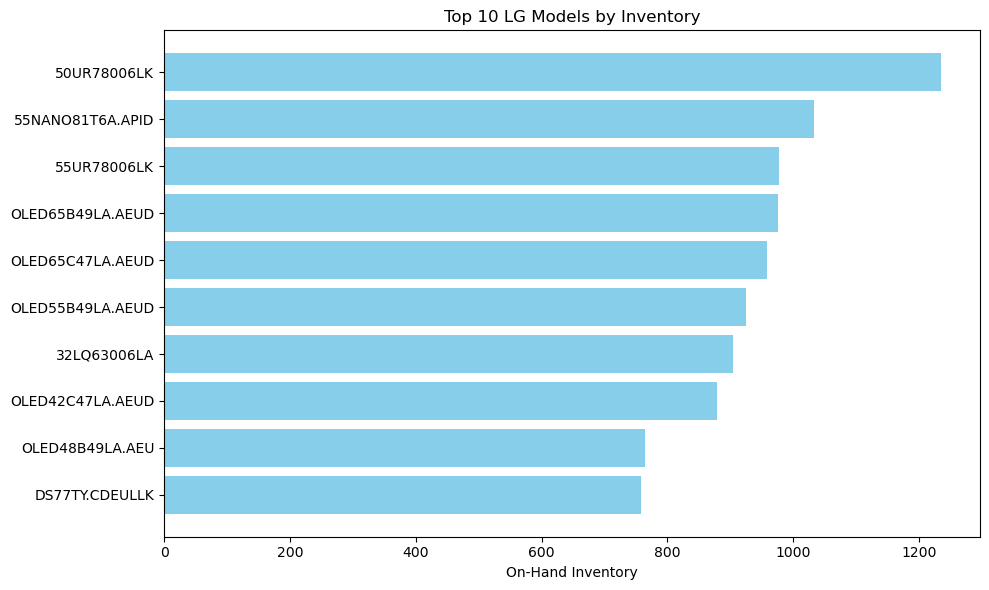

In [114]:

top_10_models = summary_by_model.sort_values(by='On-Hand (A)', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_10_models['Model'], top_10_models['On-Hand (A)'], color='skyblue')
plt.xlabel('On-Hand Inventory')
plt.title('Top 10 LG Models by Inventory')
plt.gca().invert_yaxis()
chart_path = os.path.join(folder_name, f"top_10_models_chart_{timestamp}.png")
plt.tight_layout()
plt.savefig(chart_path)
print(f"📈 Bar chart of top 10 models saved at: {chart_path}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_25428\1528049073.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_customer, x='Customer', y='On-Hand (A)', estimator=sum, ci=None)


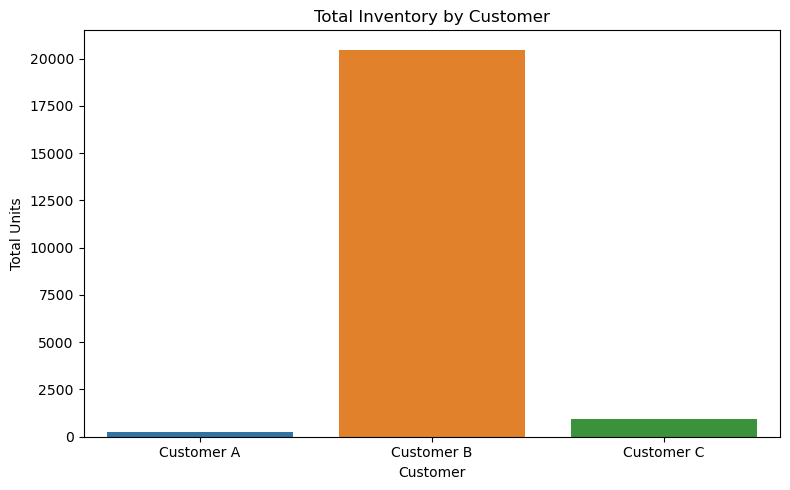

In [117]:
# 2️⃣ BAR CHART: Total Inventory by Customer (after dropping NaNs)
df_customer = consolidated_inventory.dropna(subset=['Customer', 'On-Hand (A)'])
if not df_customer.empty:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_customer, x='Customer', y='On-Hand (A)', estimator=sum, ci=None)
    plt.title("Total Inventory by Customer")
    plt.ylabel("Total Units")
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "inventory_by_customer.png"))
    plt.show()
    plt.close()

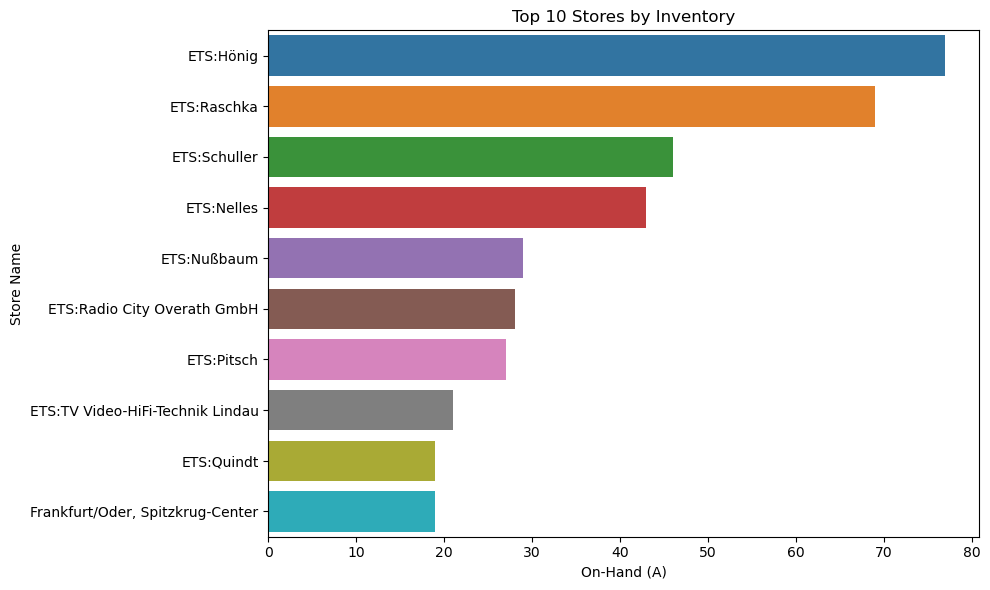

In [118]:
# 3️⃣ BAR CHART: Top 10 Stores by Inventory
df_store = consolidated_inventory.dropna(subset=['Store Name', 'On-Hand (A)'])
if not df_store.empty:
    top_stores = df_store.groupby('Store Name')['On-Hand (A)'].sum().nlargest(10).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_stores, x='On-Hand (A)', y='Store Name')
    plt.title("Top 10 Stores by Inventory")
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "top_10_stores.png"))
    plt.show()
    plt.close()